In [13]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from stompy.grid import unstructured_grid
import stompy.model.data_comparison as dc
from stompy import utils

import stompy.model.delft.dflow_model as dfm
import pesca_base

import stompy.plot.cmap as scmap
from stompy.plot import plot_utils
turbo=scmap.load_gradient('turbo.cpt')
from matplotlib import cm
import matplotlib.patheffects as pe
from matplotlib import gridspec

%matplotlib notebook

In [3]:
import six
six.moves.reload_module(dfm)
models=[]
for run_dir in ["run_salt_20160520-v00"]:
    model=dfm.DFlowModel.load(run_dir)
    models.append(model)

In [4]:
bcs=model.load_bcs()
his=xr.open_dataset(model.his_output())

Not implemented: reading BC quantity=temperaturebnd
Not implemented: reading BC quantity=temperaturebnd
Not implemented: reading BC quantity=salinitybnd
Not implemented: reading BC quantity=temperaturebnd


<IPython.core.display.Javascript object>


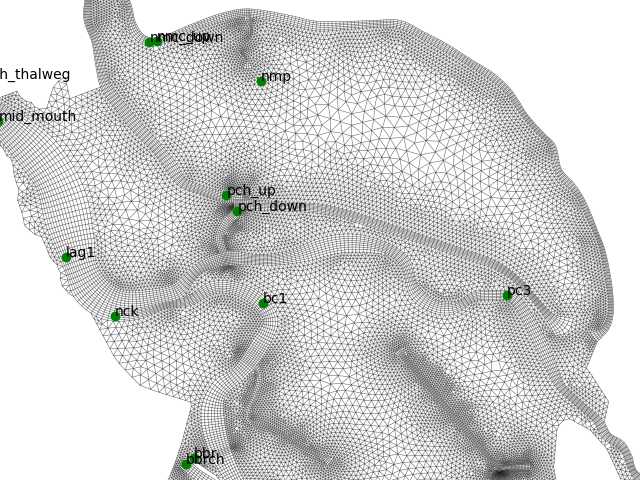

In [5]:
# Show where the monitoring stations are
g=model.grid
fig,ax=plt.subplots()

ax.axis("off")
ax.axis('tight')
ax.set_position([0,0,1,1])
ax.axis('equal')


g.plot_edges(lw=0.4,color='k',alpha=0.6)

plt.plot( his.station_x_coordinate.values,
          his.station_y_coordinate.values, 
         'go')
for stn_i,station in enumerate(his.station_name.values):
    ax.text(his.station_x_coordinate.values[stn_i],
            his.station_y_coordinate.values[stn_i],
            station.decode())

# So let's plot nck, lag1, pc3, bc1

In [10]:
Q_butano=[bc for bc in bcs if bc['name']=='butano_ck'][0]
Q_pesca= [bc for bc in bcs if bc['name']=='pescadero_ck'][0]
wl_ocean=[bc for bc in bcs if bc['name']=='ocean_bc'][0]

<IPython.core.display.Javascript object>


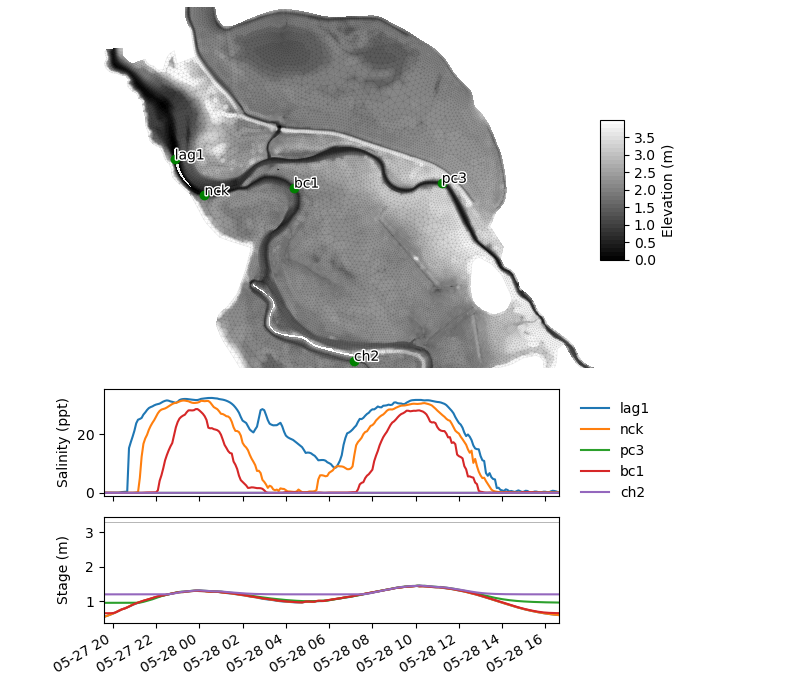

In [20]:
gs=gridspec.GridSpec(5,4)
fig=plt.figure(figsize=[8,7])
ax_map=fig.add_subplot(gs[:-2,:])
ax_wl=fig.add_subplot(gs[-1,:-1])
ax_salt=fig.add_subplot(gs[-2,:-1],sharex=ax_wl)

ax=ax_map
ax_map.axis("off")
ax_map.axis('tight')
ax_map.axis('equal')

g.plot_edges(lw=0.4,color='k',alpha=0.1,ax=ax_map)
cset=g.contourf_node_values(g.nodes['depth'],
                            np.linspace(0,4,36),
                            cmap='gray',ax=ax_map)
pos=ax_map.get_position()

cax=fig.add_axes([pos.xmax-0.15,pos.ymin+0.2,0.03,0.2])
plt.colorbar(cset,cax=cax,label='Elevation (m)',
             ticks=np.arange(0,4,0.5))

stations=[b'lag1',b'nck',b'pc3',b'bc1',b'ch2']

his=xr.open_dataset(model.his_output())
x=his.station_x_coordinate.values
y=his.station_y_coordinate.values

for station in stations:
    stn_i=np.nonzero( his.station_name.values==station)[0][0]

    ax_map.plot(x[stn_i], y[stn_i], 'go')
    ax_map.text(x[stn_i],y[stn_i], station.decode(),
                path_effects=[pe.withStroke(foreground='1.0',linewidth=2.0)])

    wl=his.waterlevel.isel(stations=stn_i)
    ax_wl.plot(his.time,wl,label=station.decode())
    salt=his.salinity.isel(stations=stn_i)
    ax_salt.plot(his.time,salt,label=station.decode())    
    
map_zoom=(552074., 553889., 4123820., 4124695.)
ax_map.axis(map_zoom)

ax_salt.set_ylabel('Salinity (ppt)')

ax_wl.set_ylabel('Stage (m)')

ax_salt.legend(loc='upper left',bbox_to_anchor=[1.02,1.],frameon=False)

plt.setp(ax_salt.get_xticklabels(),visible=0)

ax_salt.axis(xmin=wl.time.min(),
             xmax=wl.time.max())

fig.align_ylabels([ax_wl,ax_salt])

fig.subplots_adjust(left=0.13,top=0.99)

#import matplotlib.dates as mdates
#ax_wl.xaxis.set_major_locator(mdates.DayLocator())

plt.setp(ax_wl.get_xticklabels(),rotation=30,ha='right') ;
ax_wl.axhline(3.3,color='0.6',lw=0.5)
fig.savefig('salt_test.png')

NEXT
==

Get BML data onto cws-linuxmodeling, maybe in repo.
Add observed salinity to the plots above.
